# Titanic contest from Kaggle

## Analytic approach with data collection section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

%matplotlib inline

In [2]:
data_train = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data_train.shape

(891, 12)

In [10]:
data_test.shape

(418, 11)

## Preprocess visualization of data

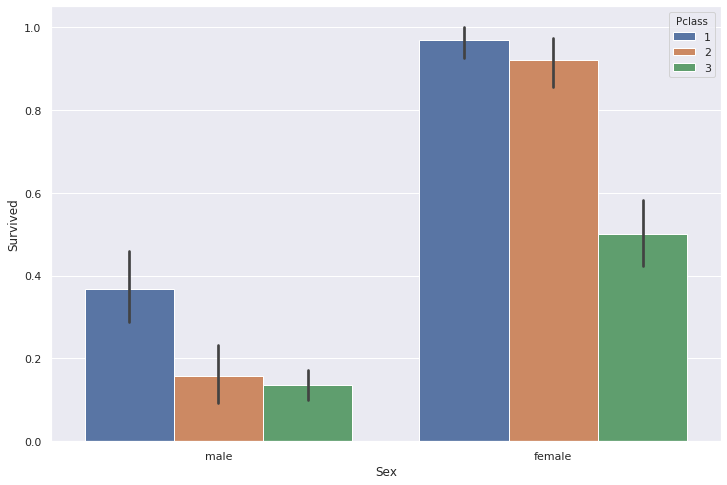

In [11]:
sns.set()
plt.figure(figsize=(12, 8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data_train)

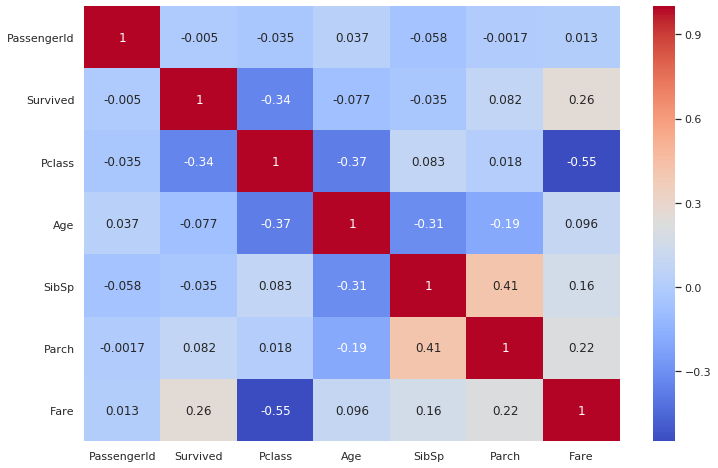

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_train.corr(), cmap='coolwarm', annot=True)

_Note: Correlates in heatmap include only numerical features_

## Data cleaning

In [13]:
# remove non affecting columns

data_train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
data_test.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [14]:
# format data in tickets column

def format_col(cell):
    try:
    
        if cell.split(' ')[1] == "2." or cell.split(' ')[1] == "Basle":
            return cell.split(' ')[2]
        
        else:
            return cell.split(' ')[1]
    
    except:
        if cell == 'LINE':
            return 0 
        
        else:
            return cell
    
data_train['Ticket'] = data_train['Ticket'].apply(format_col)
data_test['Ticket'] = data_test['Ticket'].apply(format_col)

In [15]:
data_train['Ticket'] = data_train['Ticket'].astype('int64', copy=False)
data_train['Ticket'] = pd.cut(data_train['Ticket'], 12)

data_test['Ticket'] = data_test['Ticket'].astype('int64', copy=False)
data_test['Ticket'] = pd.cut(data_test['Ticket'], 12)

In [16]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,"(-3101.317, 258443.083]",7.2500,NaN,S
1,1,1,female,38.0,1,0,"(-3101.317, 258443.083]",71.2833,C85,C
2,1,3,female,26.0,0,0,"(2842873.917, 3101317.0]",7.9250,NaN,S
3,1,1,female,35.0,1,0,"(-3101.317, 258443.083]",53.1000,C123,S
4,0,3,male,35.0,0,0,"(258443.083, 516886.167]",8.0500,NaN,S


## Feature Extraction

In [17]:
data_train["Cabin"].apply(lambda x: print(type(x)))

<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<cla

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
861    None
862    None
863    None
864    None
865    None
866    None
867    None
868    None
869    None
870    None
871    None
872    None
873    None
874    None
875    None
876    None
877    None
878    None
879    None
880    None
881    None
882    None
883    None
884    None
885    None
886    None
887    None
888    None
889    None
890    None
Name: Cabin, Length: 891, dtype: object

In [18]:
# apply 1 if person was in the Cabine

data_train["Cabin"] = data_train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
data_test["Cabin"] = data_test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [19]:
# fill missing Embarked data

data_train['Embarked'].fillna(method='ffill', inplace=True)
data_test['Embarked'].fillna(method='ffill', inplace=True)

In [20]:
# make parts of Fare amount based on median

data_train['Fare'] = data_train['Fare'].fillna(data_train['Fare'].median())
data_train['Fare'] = pd.qcut(data_train['Fare'], 4)

data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].median())
data_test['Fare'] = pd.qcut(data_test['Fare'], 4)

In [21]:
# make parts of SibSp

data_train['SibSp'] = pd.cut(data_train['SibSp'], [-1, 2, 4, 10], labels=[0, 1, 2])
data_test['SibSp'] = pd.cut(data_test['SibSp'], [-1, 2, 4, 10], labels=[0, 1, 2])

In [22]:
# make parts of Parch

data_train['Parch'] = pd.cut(data_train['Parch'], [-1, 1, 3, 10], labels=[0, 1, 2])
data_test['Parch'] = pd.cut(data_test['Parch'], [-1, 1, 3, 10], labels=[0, 1, 2])

In [23]:
# fill missing values and make parts of age category

data_train['Age'].fillna(method='ffill', inplace=True)
data_train['Age'] = pd.cut(data_train['Age'], 5)

data_test['Age'].fillna(method='ffill', inplace=True)
data_test['Age'] = pd.cut(data_test['Age'], 5)

In [24]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,"(16.336, 32.252]",0,0,"(-3101.317, 258443.083]","(-0.001, 7.91]",0,S
1,1,1,female,"(32.252, 48.168]",0,0,"(-3101.317, 258443.083]","(31.0, 512.329]",1,C
2,1,3,female,"(16.336, 32.252]",0,0,"(2842873.917, 3101317.0]","(7.91, 14.454]",0,S
3,1,1,female,"(32.252, 48.168]",0,0,"(-3101.317, 258443.083]","(31.0, 512.329]",1,S
4,0,3,male,"(32.252, 48.168]",0,0,"(258443.083, 516886.167]","(7.91, 14.454]",0,S


In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null category
SibSp       891 non-null category
Parch       891 non-null category
Ticket      891 non-null category
Fare        891 non-null category
Cabin       891 non-null int64
Embarked    891 non-null object
dtypes: category(5), int64(3), object(2)
memory usage: 39.8+ KB


In [26]:
# make dummies from categorial variables

data_train = pd.get_dummies(data=data_train, columns=['Pclass', 'Ticket', 'Sex', 'Embarked', 'Age', 'Fare', 'SibSp', 'Parch'])
data_test = pd.get_dummies(data=data_test, columns=['Pclass', 'Ticket', 'Sex', 'Embarked', 'Age', 'Fare', 'SibSp', 'Parch'])

## Modelling

In [27]:
kfold = KFold(n_splits=5)

In [28]:
# define model (ExtraTreesClassifier has the best performance)
etc = ExtraTreesClassifier()


# Search grid for optimal parameters

param_grid_set = {'n_estimators': [10, 100, 200],
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.3,.5], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.3,.5], #minimum subset size AFTER new split split (fraction is % of total); default is 1
             }


gs_etc = GridSearchCV(etc, param_grid = param_grid_set, cv=kfold, scoring="accuracy", verbose=2)

In [29]:
X_train = data_train.drop('Survived', axis=1)
X_test = data_test
y_train = data_train['Survived']

In [30]:
# X_train.drop(X_train.drop(X_test, axis=1), axis=1, inplace=True)

In [31]:
X_train.shape

(891, 36)

In [32]:
X_test.shape

(418, 36)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 36 columns):
Cabin                                891 non-null int64
Pclass_1                             891 non-null uint8
Pclass_2                             891 non-null uint8
Pclass_3                             891 non-null uint8
Ticket_(-3101.317, 258443.083]       891 non-null uint8
Ticket_(258443.083, 516886.167]      891 non-null uint8
Ticket_(516886.167, 775329.25]       891 non-null uint8
Ticket_(775329.25, 1033772.333]      891 non-null uint8
Ticket_(1033772.333, 1292215.417]    891 non-null uint8
Ticket_(1292215.417, 1550658.5]      891 non-null uint8
Ticket_(1550658.5, 1809101.583]      891 non-null uint8
Ticket_(1809101.583, 2067544.667]    891 non-null uint8
Ticket_(2067544.667, 2325987.75]     891 non-null uint8
Ticket_(2325987.75, 2584430.833]     891 non-null uint8
Ticket_(2584430.833, 2842873.917]    891 non-null uint8
Ticket_(2842873.917, 3101317.0]      891 non-null uint8

In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 36 columns):
Cabin                             418 non-null int64
Pclass_1                          418 non-null uint8
Pclass_2                          418 non-null uint8
Pclass_3                          418 non-null uint8
Ticket_(-3099.313, 258444.75]     418 non-null uint8
Ticket_(258444.75, 516887.5]      418 non-null uint8
Ticket_(516887.5, 775330.25]      418 non-null uint8
Ticket_(775330.25, 1033773.0]     418 non-null uint8
Ticket_(1033773.0, 1292215.75]    418 non-null uint8
Ticket_(1292215.75, 1550658.5]    418 non-null uint8
Ticket_(1550658.5, 1809101.25]    418 non-null uint8
Ticket_(1809101.25, 2067544.0]    418 non-null uint8
Ticket_(2067544.0, 2325986.75]    418 non-null uint8
Ticket_(2325986.75, 2584429.5]    418 non-null uint8
Ticket_(2584429.5, 2842872.25]    418 non-null uint8
Ticket_(2842872.25, 3101315.0]    418 non-null uint8
Sex_female                        418 non-null 

## Evaluation

In [35]:
gs_etc.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_es

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=1, min_s

[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=5, min_samples_split=10, n_e

[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_s

[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_

[CV]  max_depth=2, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.3, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.3, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.3, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.3, m

[CV]  max_depth=2, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, min_samples_leaf=0.5, min_sampl

[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=2, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=2, m

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=10, n_e

[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=0.5, n_estimators=200, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators

[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_

[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_s

[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=0.3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=0.3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=0.3

[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_

[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, mi

[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=200, total=   0.1s
[CV] max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=4, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=200, total=   0.1s
[CV] max_depth=4, m

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_sp

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimator

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=5, min

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=0.3, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, mi

[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples

[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=6, mi

[CV]  max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=6, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=6, min_samples_

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimato

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, min_samp

[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_sp

[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_s

[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=10,

[CV]  max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=0.3, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_

[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=2, n_estimators=200, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=0.5, min

[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=200, total=   0.1s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=8, min_sampl

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, mi

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_s

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5,

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1

[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples

[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=10, total=   0.0s
[CV] max_d

[CV]  max_depth=10, min_samples_leaf=0.5, min_samples_split=5, n_estimators=200, total=   0.1s
[CV] max_depth=10, min_samples_leaf=0.5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=0.5, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=0.5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples

[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_sampl

[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max

[CV]  max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=None, min_sampl

[CV]  max_depth=None, min_samples_leaf=5, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, min_sam

[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=0.3, n_estimators=200, total=   0.

[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max

[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100, total=   0.1s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200, 

[CV]  max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=0.5, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=None, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=0.5, min_samples_split=0.3, n_estimators=10, total=   0.

[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:  3.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn

## Deployment

In [36]:
predictions = gs_etc.predict(X_train)
submission = pd.DataFrame(gs_etc.predict(X_test))

In [41]:
submission.to_csv('submission_new.csv')

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(16,12))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# plot_learning_curve(gs_etc, 'Grid Search Extra Trees Classifier learning curve', X_train, y_train, ylim=(0.7, 1.01), cv=kfold, n_jobs=1)

## Feedback

In [39]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       549
           1       0.84      0.73      0.78       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891

